In [5]:
import matplotlib.pyplot as plt
import pandas as pd

seqDf = pd.read_csv('outSeq.txt', sep=',')
cudDf = pd.read_csv('outCuda.txt', sep=',')
cudShDf = pd.read_csv('outCudaShared.txt', sep=',')
cud2dDf = pd.read_csv('outCuda2D.txt', sep=',')

In [6]:
import numpy as np

n = seqDf["n"].drop_duplicates().to_numpy()
avgDf = pd.DataFrame(columns=["Sequential","Cuda","Cuda Shared","Cuda 2D"], index=n)

for i in n:
    print(i)
    avgSeq = 0
    avgCud = 0
    avgCsh = 0
    avgC2d = 0

    for index, row in seqDf.loc[seqDf["n"] == i].iterrows():
        avgSeq += row["time"]
    avgSeq /= len(seqDf.loc[seqDf["n"] == i])
    avgSeq /= 1000

    for index, row in cudDf.loc[cudDf["n"] == i].iterrows():
        avgCud += row["time"]
    avgCud /= len(cudDf.loc[cudDf["n"] == i])
    avgCud /= 1000

    for index, row in cudShDf.loc[cudShDf["n"] == i].iterrows():
        avgCsh += row["time"]
    avgCsh /= len(cudShDf.loc[cudShDf["n"] == i])
    avgCsh /= 1000

    for index, row in cud2dDf.loc[cud2dDf["n"] == i].iterrows():
        avgC2d += row["time"]
    avgC2d /= len(cud2dDf.loc[cud2dDf["n"] == i])
    avgC2d /= 1000

    avgDf.loc[i] = {"Sequential": avgSeq,"Cuda": avgCud,"Cuda Shared": avgCsh,"Cuda 2D": avgC2d}


display(avgDf)

16
32
64
128
256


,Sequential,Cuda,Cuda Shared,Cuda 2D
16,25.8558,57.6354,204.2868,40.574
32,93.5472,82.4628,203.6546,66.0718
64,340.9718,162.2084,203.7118,127.205
128,1304.834,284.609,203.6262,243.4218
256,5100.3588,607.0336,203.7994,502.4828


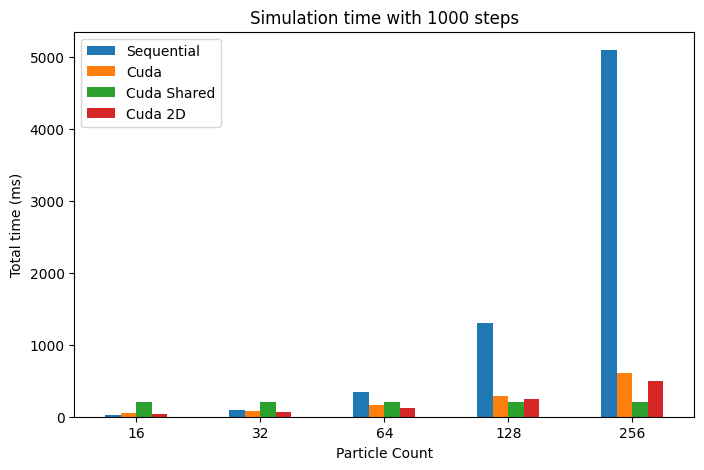

In [8]:
ax = avgDf.plot(kind='bar', rot=0, xlabel='Particle Count', ylabel='Total time (ms)', title='Simulation time with 1000 steps', figsize=(8, 5))